<a href="https://colab.research.google.com/github/sanjayi2000/MachineLearning/blob/main/2348552_DLLAB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [38]:
df=pd.read_csv("//content/dl5.csv")

In [39]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [41]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [42]:
df = df.drop(columns=['State'])

In [43]:
from sklearn.preprocessing import LabelEncoder

columns=['Voice mail plan','International plan','Churn']

for i in columns:
  encoder = LabelEncoder()
  df[i] = encoder.fit_transform(df[i])

In [44]:
from sklearn.preprocessing import StandardScaler

dataScale = df.drop(columns=['Churn'])
for i in dataScale.columns:
    scale = StandardScaler()
    df[i] = scale.fit_transform(df[i].values.reshape(-1, 1))


In [45]:
x = df.drop(columns=['Churn'])
y = df['Churn']

In [46]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
def baseline_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

baseline_model = baseline_model()
baseline_history = baseline_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

baseline_model.evaluate(X_val, y_val)

baseline_predictions = baseline_model.predict(X_val)
baseline_pred_labels = (baseline_predictions > 0.5).astype(int)

baseline_accuracy = accuracy_score(y_val, baseline_pred_labels)
print(f'Baseline Model Accuracy: {baseline_accuracy}')

baseline_f1_score = f1_score(y_val, baseline_pred_labels)
print(f'Baseline Model F1 Score: {baseline_f1_score}')

baseline_roc_auc = roc_auc_score(y_val, baseline_pred_labels)
print(f'Baseline Model roc Score: {baseline_roc_auc}')

Epoch 1/10
17/17 [==============================] - 1s 12ms/step - loss: 0.4907 - accuracy: 0.8199 - val_loss: 0.3734 - val_accuracy: 0.8881
Epoch 2/10
17/17 [==============================] - 0s 3ms/step - loss: 0.3836 - accuracy: 0.8499 - val_loss: 0.3413 - val_accuracy: 0.8881
Epoch 3/10
17/17 [==============================] - 0s 4ms/step - loss: 0.3387 - accuracy: 0.8499 - val_loss: 0.3157 - val_accuracy: 0.8955
Epoch 4/10
17/17 [==============================] - 0s 4ms/step - loss: 0.3060 - accuracy: 0.8593 - val_loss: 0.2986 - val_accuracy: 0.8955
Epoch 5/10
17/17 [==============================] - 0s 3ms/step - loss: 0.2757 - accuracy: 0.8968 - val_loss: 0.2825 - val_accuracy: 0.9328
Epoch 6/10
17/17 [==============================] - 0s 5ms/step - loss: 0.2509 - accuracy: 0.9024 - val_loss: 0.2809 - val_accuracy: 0.9403
Epoch 7/10
17/17 [==============================] - 0s 5ms/step - loss: 0.2257 - accuracy: 0.9099 - val_loss: 0.2710 - val_accuracy: 0.9403
Epoch 8/10
17/17 [=

In [49]:
def dropout_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(0.5),
        Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

dropout_model = dropout_model()
dropout_history = dropout_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

dropout_model.evaluate(X_val, y_val)

dropout_predictions = dropout_model.predict(X_val)
dropout_pred_labels = (dropout_predictions > 0.5).astype(int)

dropout_accuracy = accuracy_score(y_val, dropout_pred_labels)
print(f'Dropout Model Accuracy: {dropout_accuracy}')

dropout_f1_score = f1_score(y_val, dropout_pred_labels)
print(f'Dropout Model F1 Score: {dropout_f1_score}')

dropout_roc_auc = roc_auc_score(y_val, dropout_pred_labels)
print(f'Baseline Model roc Score: {dropout_roc_auc}')

Epoch 1/10
17/17 [==============================] - 1s 12ms/step - loss: 0.6003 - accuracy: 0.6848 - val_loss: 0.4651 - val_accuracy: 0.8881
Epoch 2/10
17/17 [==============================] - 0s 4ms/step - loss: 0.4769 - accuracy: 0.8218 - val_loss: 0.3932 - val_accuracy: 0.8881
Epoch 3/10
17/17 [==============================] - 0s 4ms/step - loss: 0.4500 - accuracy: 0.8518 - val_loss: 0.3756 - val_accuracy: 0.8881
Epoch 4/10
17/17 [==============================] - 0s 4ms/step - loss: 0.4408 - accuracy: 0.8462 - val_loss: 0.3699 - val_accuracy: 0.8881
Epoch 5/10
17/17 [==============================] - 0s 3ms/step - loss: 0.4375 - accuracy: 0.8386 - val_loss: 0.3625 - val_accuracy: 0.8881
Epoch 6/10
17/17 [==============================] - 0s 3ms/step - loss: 0.4064 - accuracy: 0.8499 - val_loss: 0.3465 - val_accuracy: 0.8881
Epoch 7/10
17/17 [==============================] - 0s 4ms/step - loss: 0.4048 - accuracy: 0.8555 - val_loss: 0.3413 - val_accuracy: 0.8881
Epoch 8/10
17/17 [=

Layer Wise Dropouts:

In [50]:
def layerwise_dropout_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(0.2),
        Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

layerwise_dropout_model = layerwise_dropout_model()
layerwise_dropout_history = layerwise_dropout_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

layerwise_dropout_evaluation = layerwise_dropout_model.evaluate(X_val, y_val)
print("Layer-wise Dropout Model Evaluation:", layerwise_dropout_evaluation)

layerwise_dropout_predictions = layerwise_dropout_model.predict(X_val)
layerwise_dropout_pred_labels = (layerwise_dropout_predictions > 0.5).astype(int)

layerwise_dropout_accuracy = accuracy_score(y_val, layerwise_dropout_pred_labels)
print(f'Layer-wise Dropout Model Accuracy: {layerwise_dropout_accuracy}')

layerwise_dropout_f1_score = f1_score(y_val, layerwise_dropout_pred_labels)
print(f'Layer-wise Dropout Model F1 Score: {layerwise_dropout_f1_score}')

layerwise_roc_auc = roc_auc_score(y_val, layerwise_dropout_pred_labels)
print(f'Baseline Model roc Score: {layerwise_roc_auc}')

Epoch 1/10
17/17 [==============================] - 2s 18ms/step - loss: 0.4917 - accuracy: 0.8330 - val_loss: 0.4063 - val_accuracy: 0.8881
Epoch 2/10
17/17 [==============================] - 0s 5ms/step - loss: 0.4351 - accuracy: 0.8499 - val_loss: 0.3718 - val_accuracy: 0.8881
Epoch 3/10
17/17 [==============================] - 0s 6ms/step - loss: 0.3933 - accuracy: 0.8462 - val_loss: 0.3564 - val_accuracy: 0.8881
Epoch 4/10
17/17 [==============================] - 0s 5ms/step - loss: 0.3841 - accuracy: 0.8518 - val_loss: 0.3430 - val_accuracy: 0.8881
Epoch 5/10
17/17 [==============================] - 0s 6ms/step - loss: 0.3709 - accuracy: 0.8518 - val_loss: 0.3302 - val_accuracy: 0.8881
Epoch 6/10
17/17 [==============================] - 0s 4ms/step - loss: 0.3659 - accuracy: 0.8480 - val_loss: 0.3229 - val_accuracy: 0.8806
Epoch 7/10
17/17 [==============================] - 0s 4ms/step - loss: 0.3282 - accuracy: 0.8668 - val_loss: 0.3088 - val_accuracy: 0.8881
Epoch 8/10
17/17 [=

Implementing Monte Carlo (MC) Dropout

In [51]:
def make_mc_predictions(model, inputs, num_samples=100):
    predictions = []
    for _ in range(num_samples):
        preds = model.predict(inputs)
        predictions.append(preds)
    predictions = np.array(predictions)
    mean_preds = np.mean(predictions, axis=0)
    return mean_preds

mc_predictions = make_mc_predictions(dropout_model, X_val)

mc_pred_labels = (mc_predictions > 0.5).astype(int)

mc_accuracy = accuracy_score(y_val, mc_pred_labels)
print(f'MC Dropout Model Accuracy: {mc_accuracy}')

mc_f1_score = f1_score(y_val, mc_pred_labels)
print(f'MC Dropout Model F1 Score: {mc_f1_score}')

mc_roc_auc = roc_auc_score(y_val, mc_pred_labels)
print(f'Baseline Model roc Score: {mc_roc_auc}')

5/5 [==============================] - 0s 2ms/step
MC Dropout Model Accuracy: 0.8955223880597015
MC Dropout Model F1 Score: 0.125
Baseline Model roc Score: 0.5333333333333333


Function to Plot Accuracy and Loss Curves

In [52]:
import matplotlib.pyplot as plt
def plot_history(history, title=""):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy ' + title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss ' + title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [53]:
print(f'Baseline Model Accuracy: {baseline_accuracy}')
print(f'Baseline Model F1 Score: {baseline_f1_score}')
print(f'Baseline Model roc Score: {baseline_roc_auc}')

print()
print(f'Dropout Model Accuracy: {dropout_accuracy}')
print(f'Dropout Model F1 Score: {dropout_f1_score}')
print(f'Baseline Model roc Score: {dropout_roc_auc}')

print()
print(f'Layer-wise Dropout Model Accuracy: {layerwise_dropout_accuracy}')
print(f'Layer-wise Dropout Model F1 Score: {layerwise_dropout_f1_score}')
print(f'Baseline Model roc Score: {layerwise_roc_auc}')

print()
print(f'MC Dropout Model Accuracy: {mc_accuracy}')
print(f'MC Dropout Model F1 Score: {mc_f1_score}')
print(f'Baseline Model roc Score: {mc_roc_auc}')


Baseline Model Accuracy: 0.9402985074626866
Baseline Model F1 Score: 0.6363636363636364
Baseline Model roc Score: 0.7333333333333334

Dropout Model Accuracy: 0.8955223880597015
Dropout Model F1 Score: 0.125
Baseline Model roc Score: 0.5333333333333333

Layer-wise Dropout Model Accuracy: 0.9104477611940298
Layer-wise Dropout Model F1 Score: 0.4545454545454545
Baseline Model roc Score: 0.6582633053221287

MC Dropout Model Accuracy: 0.8955223880597015
MC Dropout Model F1 Score: 0.125
Baseline Model roc Score: 0.5333333333333333


Baseline Model

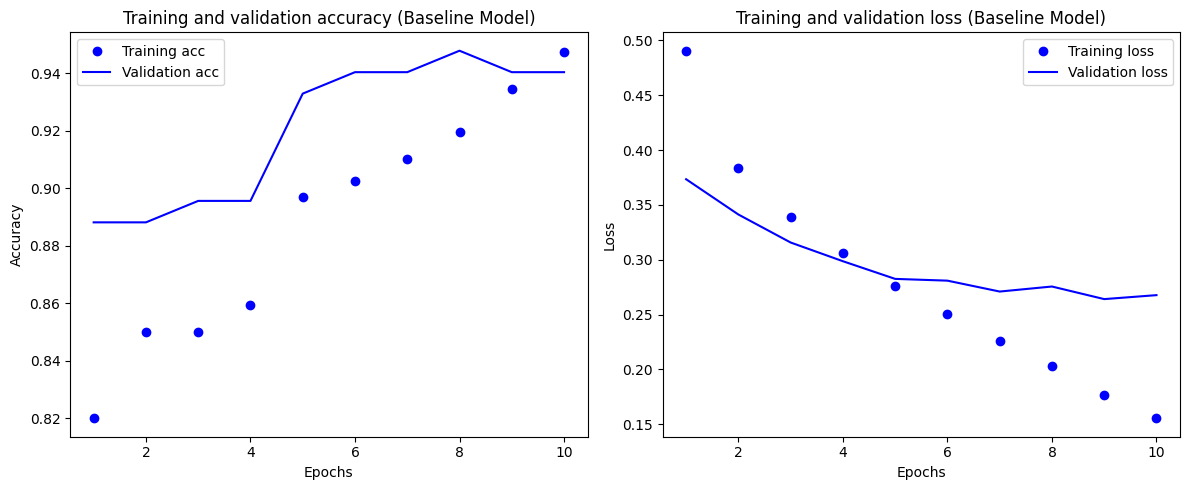

In [54]:
plot_history(baseline_history, title="(Baseline Model)")

Dropout Model

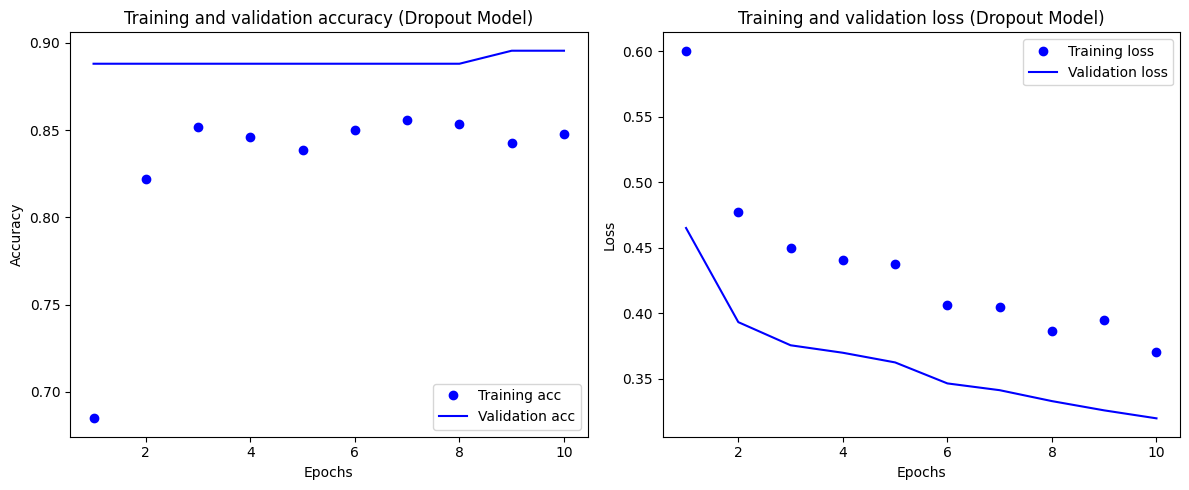

In [55]:
plot_history(dropout_history, title="(Dropout Model)")

Model With Layer Wise Dropout

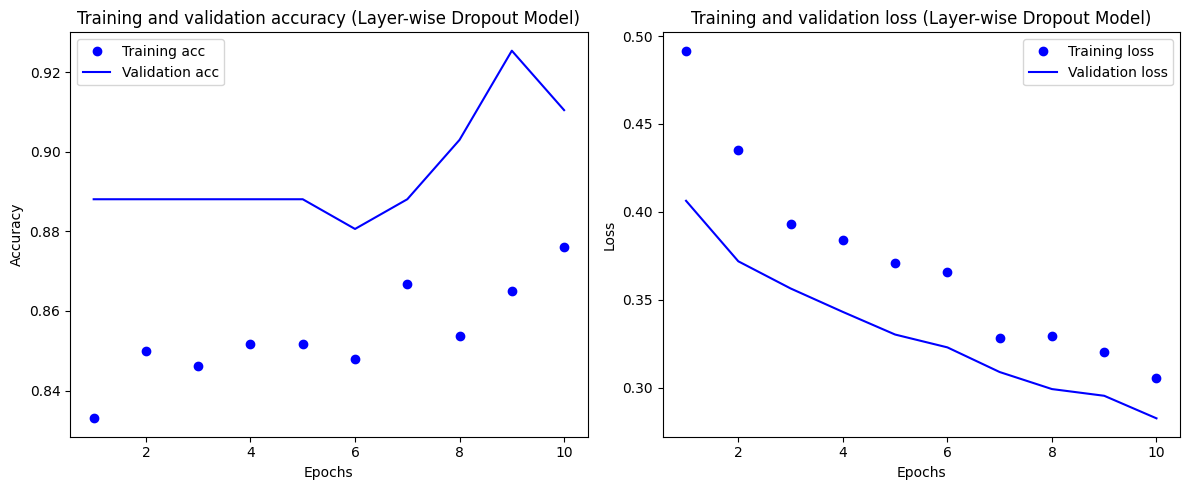

In [56]:
plot_history(layerwise_dropout_history, title="(Layer-wise Dropout Model)")